# Student grades prediction

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades:

1. Columns Description-  total 43 columns.
2. Seat No : The enrolled number of candidate that took the exams.
3. CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
4. All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df=pd.read_csv('C:/Users/jdjra/OneDrive/Desktop/Internship/Grades.csv')

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df['Seat No.'].nunique()

571

We can conclude that the column 'Seat No.' is a unique identifier nd are unlikely to have any impact on glass classification. Hence, removing the column from the dataframe.

In [5]:
#removing the column 'Id number'
df=df.drop(['Seat No.'],axis=1)

In [6]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [7]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [8]:
df.columns.tolist()

['PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

CGPA is our Target variable and rest are the features.

In [9]:
#Finding duplicate rows inside the dataframe
df.duplicated(keep='first').sum()

0

There are no duplicate rows in the data set.

In [10]:
#Checking for any Null values
df.isna().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<Axes: >

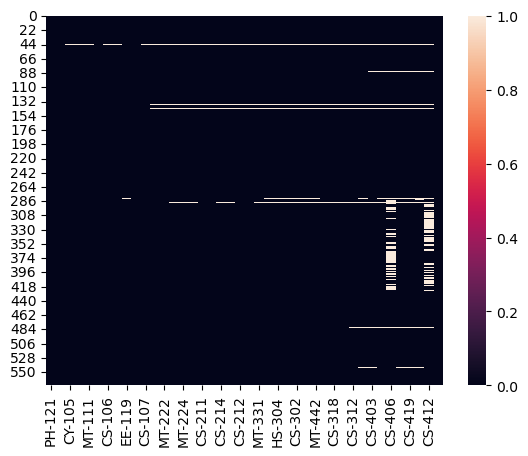

In [11]:
sns.heatmap(df.isna())

There are Null values found in the data set.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

In [13]:
grade_map = {'A+': 4.3, 'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7, 'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'F': 0.0}
# Apply mapping to grade columns
for col in df.columns[:-1]: # exclude the last column ('CGPA')
    df[col] = df[col].map(grade_map)

In [14]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.3,4.0,3.7,3.7,4.3,3.3,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,4.3,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [15]:
df.isna().sum()

PH-121        2
HS-101        0
CY-105        4
HS-105/12     3
MT-111        5
CS-105        0
CS-106        4
EL-102        5
EE-119        3
ME-107        4
CS-107        5
HS-205/20     6
MT-222        7
EE-222        9
MT-224        9
CS-210        9
CS-211        7
CS-203        6
CS-214        7
EE-217        7
CS-212        8
CS-215        8
MT-331        9
EF-303       11
HS-304       14
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332       10
CS-318       15
CS-306       10
CS-312       12
CS-317       12
CS-403       12
CS-421       14
CS-406       89
CS-414       15
CS-419       13
CS-423       14
CS-412       82
CGPA          0
dtype: int64

In [16]:
#Replacing the missing values in the columns with the mode method

columns = df.columns
for i in columns:
    columns = df[i].fillna(df[i].mode()[0], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [18]:
df.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<Axes: >

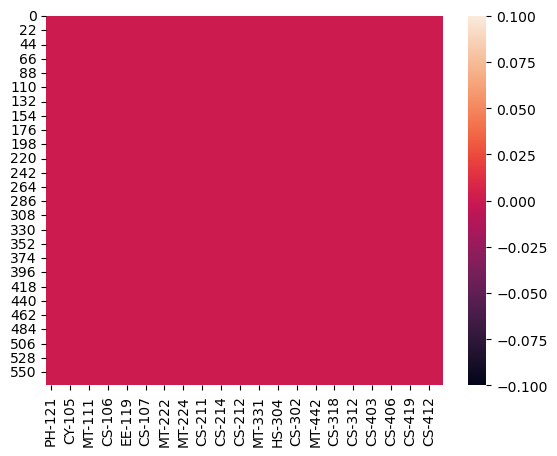

In [19]:
sns.heatmap(df.isna())

There are now no null present.

<Axes: xlabel='CGPA', ylabel='Count'>

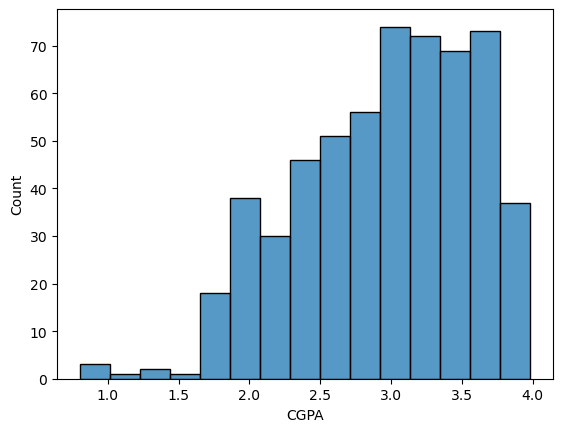

In [20]:
sns.histplot(df['CGPA'])

Encoding the Grades columns

 A+ is assigned the highest value of 4.3, followed by A with a value of 4.0, and A- with a value of 3.7. The rest of the grades are mapped in a similar manner, with F being assigned a value of 0.0.

In [21]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.3,4.0,3.7,3.7,4.3,3.3,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,4.3,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [22]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [23]:
x=df.drop('CGPA',axis=1)
y=df['CGPA']

In [24]:
lr=LinearRegression()

In [25]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print(maxAccu, maxRs)



0.9531530144104026 59


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [27]:
#importing models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge



Linear Regression


In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)
plr=lr.predict(x_test)
plr_train=lr.predict(x_train)
print('R2score: ',r2_score(y_test,plr))
print('R2score on training data: ',r2_score(y_train,plr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,plr))
print('Mean Squared error :',mean_squared_error(y_test,plr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,plr)))

R2score:  0.9531530144104026
R2score on training data:  91.06147500515566
Mean absolute error:  0.09347967312733484
Mean Squared error : 0.01563954654586039
Root mean squared error : 0.12505817264721403




Random Forest Regression


In [29]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
prfr=rfr.predict(x_test)
prfr_train=rfr.predict(x_train)
print('R2score: ',r2_score(y_test,prfr))
print('R2score on training data: ',r2_score(y_train,prfr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,prfr))
print('Mean Squared error :',mean_squared_error(y_test,prfr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,prfr)))

R2score:  0.9388624469452513
R2score on training data:  98.79849971251494
Mean absolute error:  0.10069436046511612
Mean Squared error : 0.020410355002906926
Root mean squared error : 0.1428648137327975




Decision Tree Regression


In [30]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pdtr=dtr.predict(x_test)
pdtr_train=dtr.predict(x_train)
print('R2score: ',r2_score(y_test,pdtr))
print('R2score on training data: ',r2_score(y_train,pdtr_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pdtr))
print('Mean Squared error :',mean_squared_error(y_test,pdtr))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pdtr)))

R2score:  0.8064373338964353
R2score on training data:  100.0
Mean absolute error:  0.1744709302325581
Mean Squared error : 0.06461957558139533
Root mean squared error : 0.2542038071732903


K Nearest Neighbors

In [31]:
knn=KNN()
knn.fit(x_train,y_train)
pknn=knn.predict(x_test)
pknn_train=knn.predict(x_train)
print('R2score: ',r2_score(y_test,pknn))
print('R2score on training data: ',r2_score(y_train,pknn_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pknn))
print('Mean Squared error :',mean_squared_error(y_test,pknn))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pknn)))

R2score:  0.9634278736522991
R2score on training data:  92.17433951660335
Mean absolute error:  0.0827860465116279
Mean Squared error : 0.012209354883720928
Root mean squared error : 0.11049594962586153


Lasso Regression

In [32]:
ls=Lasso()
ls.fit(x_train,y_train)
pls=ls.predict(x_test)
pls_train=ls.predict(x_train)
print('R2score: ',r2_score(y_test,pls))
print('R2score on training data: ',r2_score(y_train,pls_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,pls))
print('Mean Squared error :',mean_squared_error(y_test,pls))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pls)))

R2score:  -0.045784920887980585
R2score on training data:  0.0
Mean absolute error:  0.5092442734743838
Mean Squared error : 0.3491281614247194
Root mean squared error : 0.5908706807963308


Ridge Regression

In [33]:
rd=Ridge()
rd.fit(x_train,y_train)
prd=rd.predict(x_test)
prd_train=rd.predict(x_train)
print('R2score: ',r2_score(y_test,prd))
print('R2score on training data: ',r2_score(y_train,prd_train)*100)
print('Mean absolute error: ',mean_absolute_error(y_test,prd))
print('Mean Squared error :',mean_squared_error(y_test,prd))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,prd)))

R2score:  0.9535948465076906
R2score on training data:  91.06122139835027
Mean absolute error:  0.09302859716717607
Mean Squared error : 0.015492043914388508
Root mean squared error : 0.12446703946984723


Selecting the Best model

In [34]:
from sklearn.model_selection import cross_val_score

For LR

In [35]:
scr=cross_val_score(lr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.90049096 0.86745014 0.86999378 0.92176364 0.86031847]
0.8840033972148053
Diff b/w R2 score & CV score 6.914961719559731


For RFR

In [36]:
scr=cross_val_score(rfr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.91435437 0.92159117 0.9315287  0.92112003 0.88756897]
0.9152326486947242
Diff b/w R2 score & CV score 3.792036571567836


For DTR

In [37]:
scr=cross_val_score(dtr,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.78076378 0.87221923 0.85051594 0.76319658 0.69829052]
0.792997211015476
Diff b/w R2 score & CV score 16.01558033949265


FOR KNN

In [38]:
scr=cross_val_score(knn,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.88881021 0.84321385 0.84173838 0.95867528 0.90707724]
0.8879029915688271
Diff b/w R2 score & CV score 6.525002284157544


FOR LS

In [39]:
scr=cross_val_score(ls,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
Diff b/w R2 score & CV score 96.12365350335341


For RD

In [40]:
scr=cross_val_score(rd,x,y)
print(scr)
print(scr.mean())
print('Diff b/w R2 score & CV score', (r2_score(y_test,plr) - scr.mean())*100)

[0.9004525  0.86746927 0.8705285  0.92242791 0.86078276]
0.8843321879208255
Diff b/w R2 score & CV score 6.88208264895771


Random Forest Regression is our best model!

# Hyperparameter Tuning

In [50]:
#importing RandomizedseachCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [48]:
param = {
    'n_estimators': [5,10,20],
    'criterion': ['squared_error', 'poisson', 'friedman_mse'],
    'max_depth': [1,5,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 2],
    'min_impurity_decrease': [0.0, 0.1],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [-1],
    'random_state': [39],
    'verbose': [0, 1],
    'warm_start': [True, False],
    'ccp_alpha': [0.0, 0.1],
    'max_samples': [None, 2]
}

In [55]:
random_search = RandomizedSearchCV(RandomForestRegressor(),param, n_iter=50, cv=5, n_jobs=-1, random_state=42)
random_search.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0, 0.1],
                                        'criterion': ['squared_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [1, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [None, 2],
                                        'max_samples': [None, 2],
                                        'min_impurity_decrease': [0.0, 0.1],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'min_weight_fraction_leaf': [0.0, 0.1],
                                        'n_estimators': [5, 10, 20],
                                        'n_jobs': [-1],
                                        'oob_score': [True, False],
                                        'random_state': [39], 'verbose': [0, 1],
                                        'warm_start': [True, False]},
                   random_state=42)

In [56]:
#Finding the best parameters
random_search.best_params_

{'warm_start': False,
 'verbose': 1,
 'random_state': 39,
 'oob_score': False,
 'n_jobs': -1,
 'n_estimators': 20,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'friedman_mse',
 'ccp_alpha': 0.0,
 'bootstrap': False}

These are the best parameters for our model!

In [57]:
#Creating the final model
Final_model=RandomForestRegressor(warm_start=False,verbose=1,
                                  random_state=39,
                                  oob_score=False,
                                  n_jobs=-1,
                                  n_estimators=20,
                                  min_weight_fraction_leaf=0.0,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  min_impurity_decrease=0.0,
                                  max_samples=None,
                                  max_leaf_nodes=None,
                                  max_features='auto',
                                  max_depth=10,
                                  criterion='friedman_mse',
                                  ccp_alpha=0.0,
                                  bootstrap=False)

In [58]:
#Training the final model
Final_model.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=False, criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_split=5, n_estimators=20,
                      n_jobs=-1, random_state=39, verbose=1)

In [59]:
#Final prediction
pred=Final_model.predict(x_test)
print('R2score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error :',mean_squared_error(y_test,pred))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

R2score:  0.8153545967364852
Mean absolute error:  0.17607352596047354
Mean Squared error : 0.061642608216400115
Root mean squared error : 0.24827929477989122


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished


The final prediciton model accuracy is 81.53%.

In [60]:
#Saving our model
import joblib
joblib.dump(Final_model,'Studentgradepredictor.pkl')

['Studentgradepredictor.pkl']

In [61]:
#checking if our saved model is working
model = joblib.load('Studentgradepredictor.pkl')

prediction=model.predict(x_test)
prediction

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished


array([2.81035   , 3.41      , 2.806275  , 3.4485    , 2.9979125 ,
       3.64175   , 2.88933333, 2.633     , 3.684     , 3.60328333,
       3.191     , 2.86871667, 2.45015   , 3.3118    , 3.146     ,
       2.4314875 , 3.3855    , 3.684     , 3.454     , 2.99346154,
       2.528     , 3.6018    , 3.37463333, 3.272     , 3.673     ,
       3.02777143, 1.98675   , 1.95033333, 3.071     , 3.9255    ,
       3.454     , 2.7485    , 3.1296    , 3.673     , 2.6235    ,
       3.52      , 3.3825    , 3.31875   , 3.2399375 , 3.7647375 ,
       1.78      , 2.4208125 , 2.0568    , 2.405475  , 3.02777143,
       3.2988    , 2.78866667, 3.41      , 1.88666667, 3.704825  ,
       3.4486    , 3.50825   , 1.907     , 3.52      , 1.88666667,
       3.02433333, 3.0968    , 2.88933333, 2.0658    , 2.49108333,
       2.5542    , 3.25275   , 1.95033333, 2.0301    , 3.25275   ,
       3.454     , 3.575     , 2.89723269, 3.2602125 , 1.73025   ,
       2.802     , 2.3279    , 2.643625  , 2.60215   , 3.071  